<a href="https://colab.research.google.com/github/Mjcherono/TrialProjects/blob/main/Diabetes-outcome-prediction-The_Naive_Bayes_Classifier_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="green">*To start working on this notebook, or any other notebook that we will use in the Moringa Data Science Course, we will need to save our own copy of it. We can do this by clicking File > Save a Copy in Drive. We will then be able to make edits to our own copy of this notebook.*</font>

# Python Programming: Naive Bayes - Exploratory Data Analysis

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> The National Institute of Diabetes and Digestive and Kidney Diseases would like to have a predictive modeling solution for a problem they are currently facing. Based on certain diagnostic measurements included in the provided dataset, diagnostically predict whether or not a patient has diabetes or not.

### b) Defining the Metric for Success

We'll be able to say we've achieved success when our model is well trained, can make corect predictions and achieves hugh accuracy.

### c) Understanding the context 

### d) Recording the Experimental Design

### e) Data Relevance

Provided data is sufficient enough to solve the problem at hand and even make predictions despite the number of outliers.

## 2. Reading the Data

In [75]:
import numpy as np
import pandas as pd

In [76]:
# Loading the Data from the source i.e. csv
# ---
# Dataset source = Dataset source = http://bit.ly/DiabetesDataSource
# ---
#
diabetes = pd.read_csv('/content/diabetes.csv')
diabetes.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/formatters.py:338: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1




## 3. Checking the Data

In [77]:
# Determining the no. of records in our dataset
#
diabetes.shape

(768, 9)

In [78]:
# Previewing the top of our dataset
#
diabetes.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [79]:
# Previewing the bottom of our dataset
# 
diabetes.tail()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [80]:
# Checking whether each column has an appropriate datatype
#
diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


/usr/local/lib/python3.6/dist-packages/IPython/lib/pretty.py:709: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

An example would be suppose that you're working with a dataset on the population of countries during the year 2016. Validating such information with an external reliable resource such as World Bank Data would be important step to providing credibility to your dataset. Have a look at the following link for an example. [Link](https://rstudio-pubs-static.s3.amazonaws.com/182250_19977d0c5c06403fbad1e653850fc7c6.html).

### a.Validation

## 5. Tidying the Dataset

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


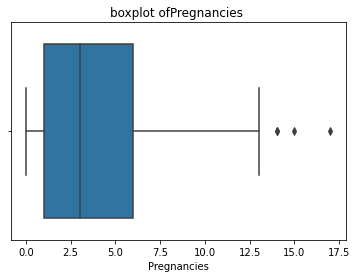

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


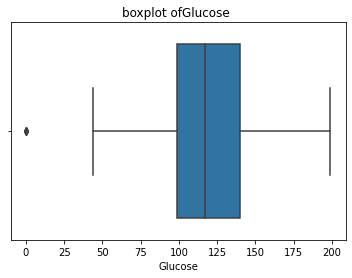

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


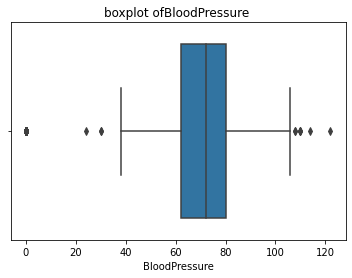

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


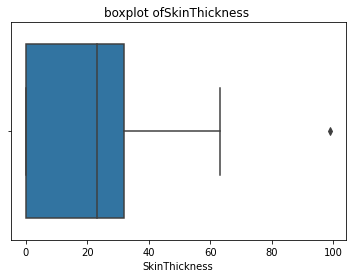

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


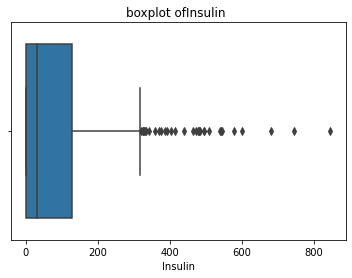

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


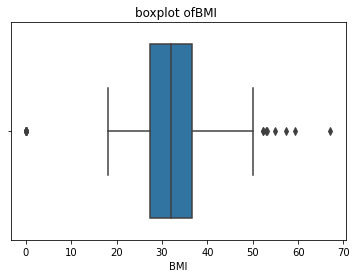

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


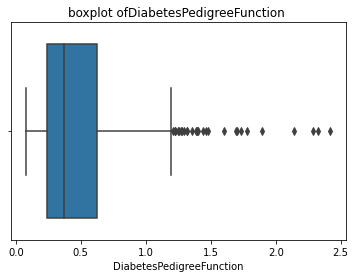

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


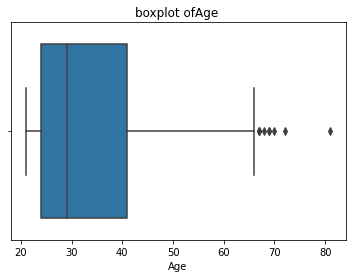

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


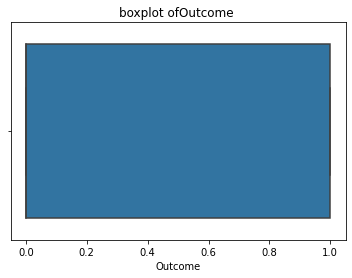

In [81]:
# Checking for Outliers
#

import matplotlib.pyplot as plt
import seaborn as sns

df = diabetes.iloc[:,0:]
for i in df:
  plt.title(f'boxplot of{i} ')
  sns.boxplot(diabetes[i])
  plt.show()

In [82]:
def outs(x):
  global a

  q1,q3 = np.percentile(a[x],[25,75])
  iqr=q3-q1
  lower_bound = q1-(1.5*iqr)
  upper_bound = q3+(1.5*iqr)
  a = a[~((a[x]<lower_bound) | (a[x]>upper_bound))]

In [83]:
a= df.copy()
for name in list(df.columns):
  outs(name)
a.shape

(636, 9)

#####This are alot to remove

In [85]:
# Identifying the Missing Data
#
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


/usr/local/lib/python3.6/dist-packages/lux/vis/VisList.py:305: UserWarning:
The following issues are ecountered when validating the parsed intent:
- The input attribute '0' does not exist in the DataFrame. 
  Please check your input intent for typos.
/usr/local/lib/python3.6/dist-packages/IPython/lib/pretty.py:709: UserWarning:
Unexpected error in rendering Lux widget and recommendations. Falling back to Pandas display.

Please report this issue on Github: https://github.com/lux-org/lux/issues 


In [98]:
 #More data cleaning procedures
#
diabetes.duplicated().sum()

0

## 6. Exploratory Analysis

In [96]:
#!pip install lux-api


In [97]:
#!pip install --py luxwidget
#!pip enable --py luxwidget

In [90]:
# Ploting the bivariate summaries and recording our observations
#
#import lux
#diabetes = pd.read_csv('/content/diabetes.csv')
#diabetes

In [91]:
#from lux.vis.Vis import Vis
#Vis(["Glucose","Pregnancies"],diabetes)

In [92]:
#from lux.vis.VisList import VisList
#VisList(["Glucose","Pregnancies"],df)

In [99]:
diabetes.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/formatters.py:338: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 7. Implementing the Solution

In [109]:
# Implementing the Solution
# 
#separating features from labels 

X = diabetes.drop('Outcome',axis=1).values
y = diabetes['Outcome'].values

#splitting to train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#feature reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

#training model
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()  

# Train model
clf.fit(X_train, y_train)

#Making predictions
y_pred = clf.predict(X_test)

#Evaluating the algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[97 10]
 [18 29]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       107
           1       0.74      0.62      0.67        47

    accuracy                           0.82       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154



## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [95]:
# Reviewing the Solution 
#

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

Yes we did have the right data despite the many outliers. Performance would have been way better if the outliers were few ina way to get rid of them

### b). Do we need other data to answer our question?

The provided data was relevant enough for the question

### c). Did we have the right question?

Yes since we were able to solve our problem, train our model and even make predictions. 